In [1]:
# Step 1: Importing the libraries
import numpy as np               # to inculude mathematics
import matplotlib.pyplot as plt  # Ploting graph
import pandas as pd              # import & manage datasets 

In [2]:
# Step 2: Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1].values.reshape((-1, 1)) # level
y = dataset.iloc[:, -1].values.reshape((-1, 1)) # Salaries

## Step 2(a): Clearing Data
dataset.describe() # count, mean, std, min, max, 25%, 50%, 75%
dataset.info()	 # names > cols, data type, memory usage
print(dataset.isnull().sum())  # Report missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
Position    0
Level       0
Salary      0
dtype: int64


In [3]:
# Strep 3(a): Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [4]:
# Step 4: Applying technique-> Support Vector Regression
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # rbf = Readial Basis Function
regressor.fit(X, y)

/home/hamza/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
# Step 5: Prediction
testerElement = regressor.predict(sc_X.transform(np.array([6.5]).reshape((-1, 1))))
y_pred = sc_y.inverse_transform(testerElement)
y_pred

array([170370.0204065])

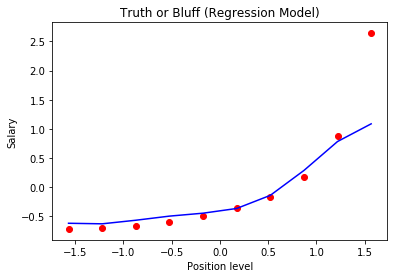

In [7]:
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

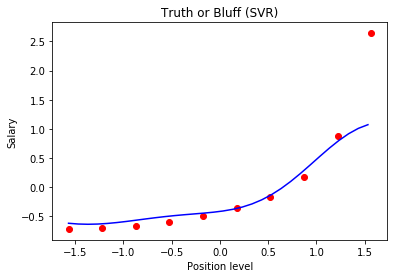

In [8]:
# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()